In [ ]:
from google.colab import files
uploaded = files.upload()


Saving owid-covid-data.csv to owid-covid-data.csv


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Step 1: data loading and exploration
covid_df = pd.read_csv('owid-covid-data.csv')


In [ ]:
# Data Exploration
print('\nColumns in the dataset:')
print(covid_df.columns)

print('\nFirst 5 rows of the dataset:')
print(covid_df.head())

print('\nChecking for missing values:')
print(covid_df.isnull().sum())



Columns in the dataset:
Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinat

In [ ]:
# Data Cleaning
print('\nFiltering data for selected countries (Kenya, USA, India)...')
selected_countries = ['Kenya', 'United States', 'India']
covid_df = covid_df[covid_df['location'].isin(selected_countries)].copy()

print('\nConverting date column to datetime...')
covid_df['date'] = pd.to_datetime(covid_df['date'])

print('\nHandling missing numeric values...')
numeric_cols = covid_df.select_dtypes(include='number').columns
covid_df[numeric_cols] = covid_df[numeric_cols].fillna(0)



Filtering data for selected countries (Kenya, USA, India)...

Converting date column to datetime...

Handling missing numeric values...


In [ ]:
# Basic EDA
print('\nSummary statistics for selected countries:')
print(covid_df.describe())


Summary statistics for selected countries:
                                date   total_cases     new_cases  \
count                           2270  2.270000e+03  2.270000e+03   
mean   2021-02-19 22:11:31.453744640  1.435000e+07  5.398755e+04   
min              2020-01-22 00:00:00  0.000000e+00  0.000000e+00   
25%              2020-08-15 00:00:00  1.295510e+05  4.005000e+02   
50%              2021-02-20 00:00:00  4.139202e+06  1.787100e+04   
75%              2021-08-28 00:00:00  3.097903e+07  5.805800e+04   
max              2022-03-05 00:00:00  7.926573e+07  1.368167e+06   
std                              NaN  1.844246e+07  1.069643e+05   

       new_cases_smoothed   total_deaths   new_deaths  new_deaths_smoothed  \
count         2270.000000    2270.000000  2270.000000          2270.000000   
mean         53921.422219  220659.573568   648.343612           638.604965   
min              0.000000       0.000000     0.000000             0.000000   
25%            427.714000    23

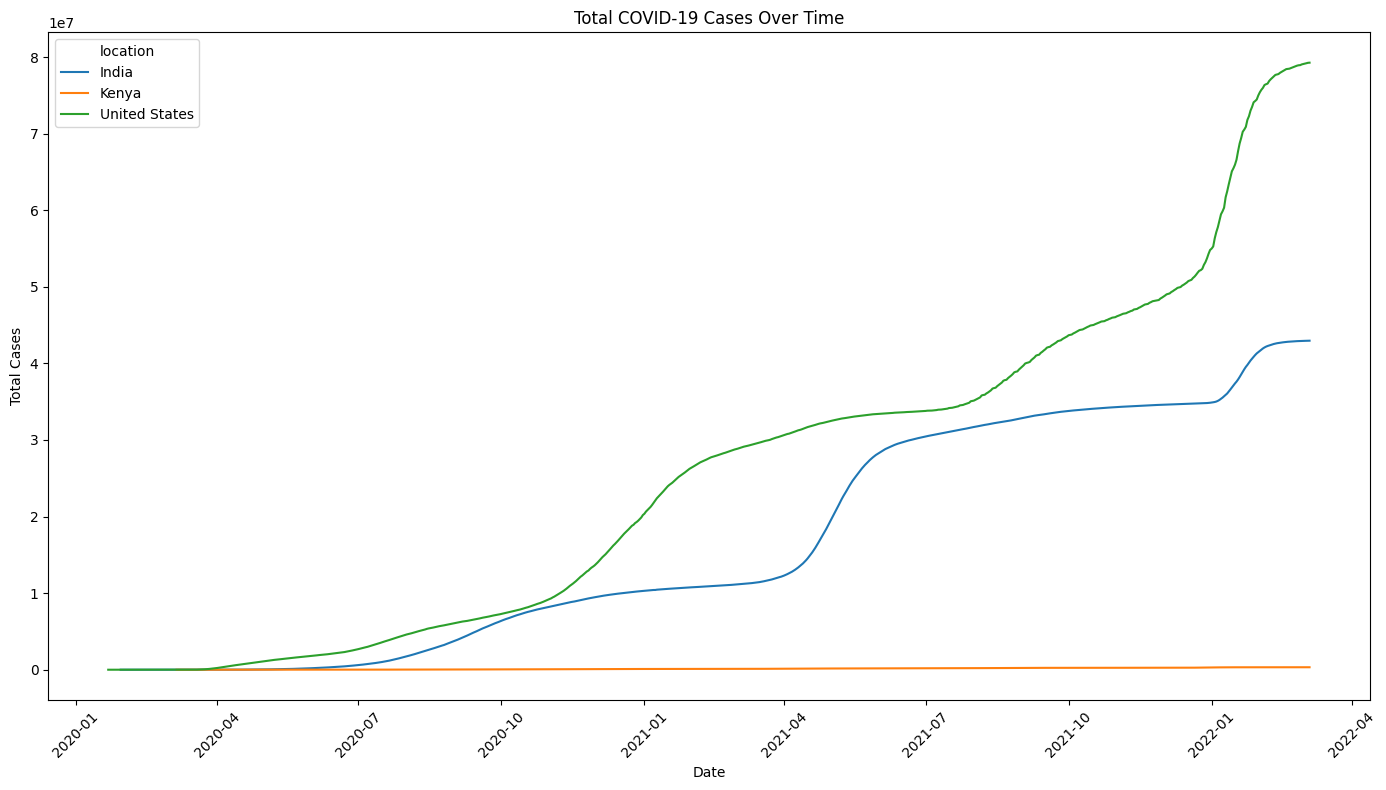

In [ ]:
# Total Cases Over Time
plt.figure(figsize=(14, 8))
sns.lineplot(data=covid_df, x='date', y='total_cases', hue='location')
plt.title('Total COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

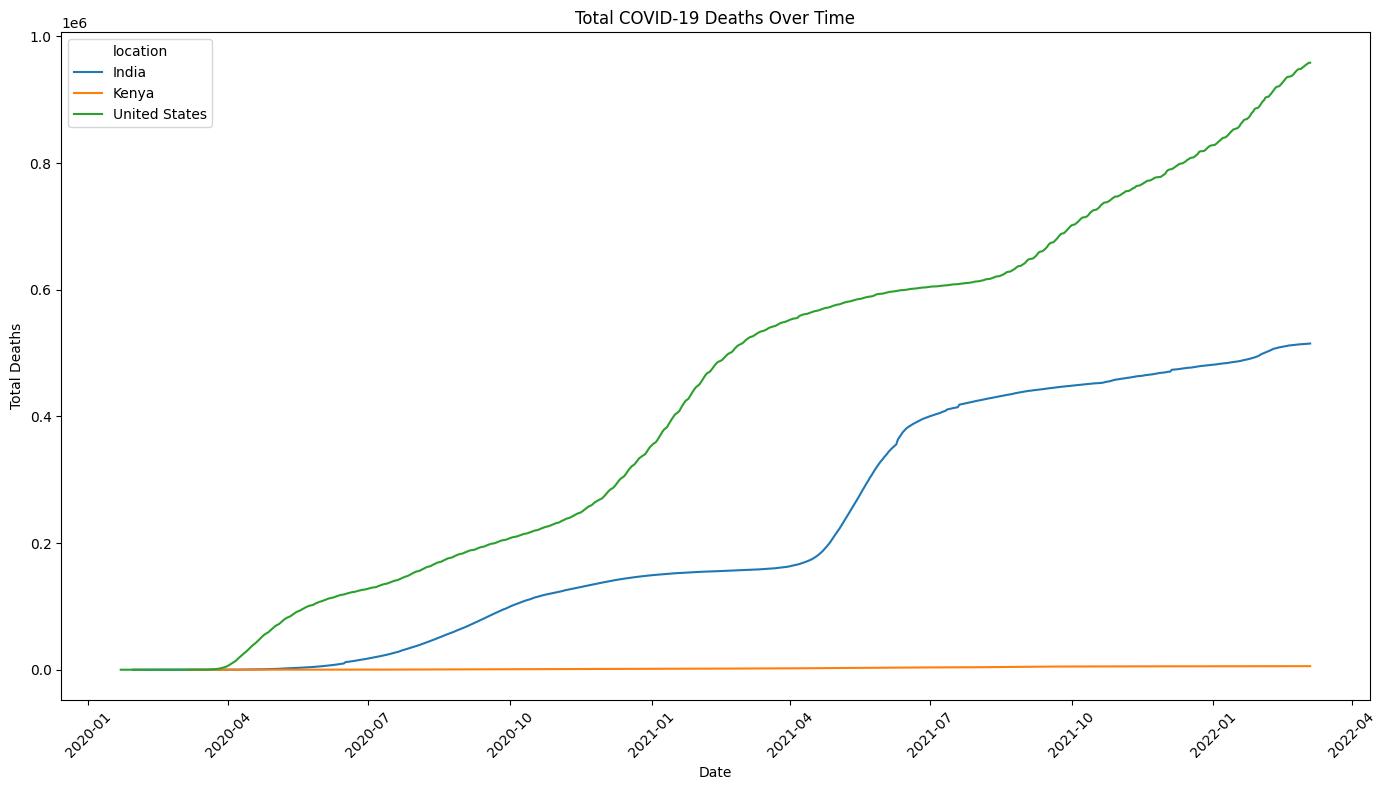

In [ ]:
# Total Deaths Over Time
plt.figure(figsize=(14, 8))
sns.lineplot(data=covid_df, x='date', y='total_deaths', hue='location')
plt.title('Total COVID-19 Deaths Over Time')
plt.xlabel('Date')
plt.ylabel('Total Deaths')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

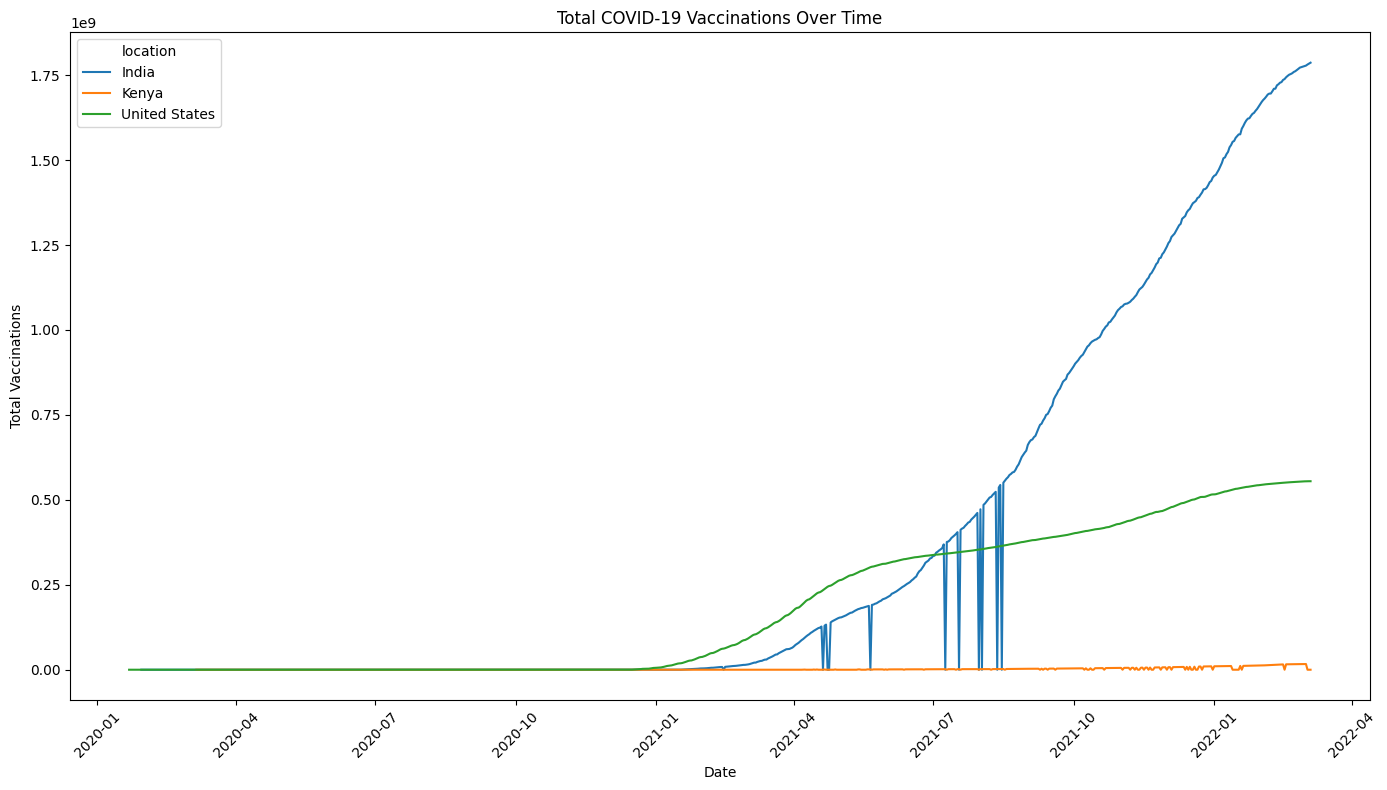

In [ ]:
# Vaccination Progress
if 'total_vaccinations' in covid_df.columns:
    plt.figure(figsize=(14, 8))
    sns.lineplot(data=covid_df, x='date', y='total_vaccinations', hue='location')
    plt.title('Total COVID-19 Vaccinations Over Time')
    plt.xlabel('Date')
    plt.ylabel('Total Vaccinations')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("\nColumn 'total_vaccinations' not found in dataset.")


In [ ]:
# Optional: Choropleth Map
if {'location', 'iso_code', 'total_cases'}.issubset(covid_df.columns):
    latest_data = covid_df.sort_values('date').groupby(['location', 'iso_code']).last().reset_index()
    fig = px.choropleth(
        latest_data,
        locations='iso_code',
        color='total_cases',
        hover_name='location',
        title='Global COVID-19 Total Cases',
        color_continuous_scale='Reds'
    )
    fig.show()
else:
    print("\nNecessary columns for choropleth not found.")

In [2]:
# Insights & Reporting

print('\nKey Insights:')
insights = [
    "The United States has the highest total cases among the selected countries, reflecting its large population.",
    "The roll out of vaccinations in India is high as compared to the USA and Kenya.",
    "Vaccination campaigns have significantly reduced the death rates over time, as seen in the flattening of the death curve.",
    "The data highlights the importance of early vaccination to control mortality rates."
]

for i, insight in enumerate(insights, 1):
    print(f"{i}. {insight}")


Key Insights:
1. The United States has the highest total cases among the selected countries, reflecting its large population.
2. The roll out of vaccinations in India is high as compared to the USA and Kenya.
3. Vaccination campaigns have significantly reduced the death rates over time, as seen in the flattening of the death curve.
4. The data highlights the importance of early vaccination to control mortality rates.
